<h1> Комментарий ревьюера </h1>

Привет, Максим!
Меня зовут Виктория Ильина, и я буду проверять твой проект. Предлагаю общаться на "ты", но если тебе будет не комфортно, обязательно сообщи и мы перейдем на "вы". 

Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе стать специалистом по Data Science. Ты уже проделал большую работу над проектом, но давай сделаем его ещё лучше. Ниже ты найдёшь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать различные цвета, чтобы было легче воспринимать мои комментарии:

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера🤔:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Однако, если перед нами стоит цель не просто сдать проект и забыть, а приобрести новые знания и успешно применять их в будущем, я бы всё-таки рекомендовала тебе прорабатывать эти недочёты.
</div>
    
<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Так я выделю все остальные комментарии.
</div>
    
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии - пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Например, вот так.
</div>

Давай посмотрим, что получилось!

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Подключение библиотек</a></span></li></ul></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

### Подключение библиотек

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import allclose
import os
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Загрузка данных

In [103]:
pth1 = '/Users/maksimkeller/Desktop/Jupyter/linal/insurance.csv'
pth2 = '/datasets/insurance.csv'
if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Все библиотеки импортированы и данные загружены, можем двигаться дальше!
</div>


In [104]:
print(data.info())
display(data.head())
display(data.sample(3))
display(data.describe(include='all'))
print('Количество дубликатов:', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
1335,1,23.0,47200.0,0,0
2253,1,53.0,29700.0,1,2
4404,1,38.0,35800.0,2,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Количество дубликатов: 153


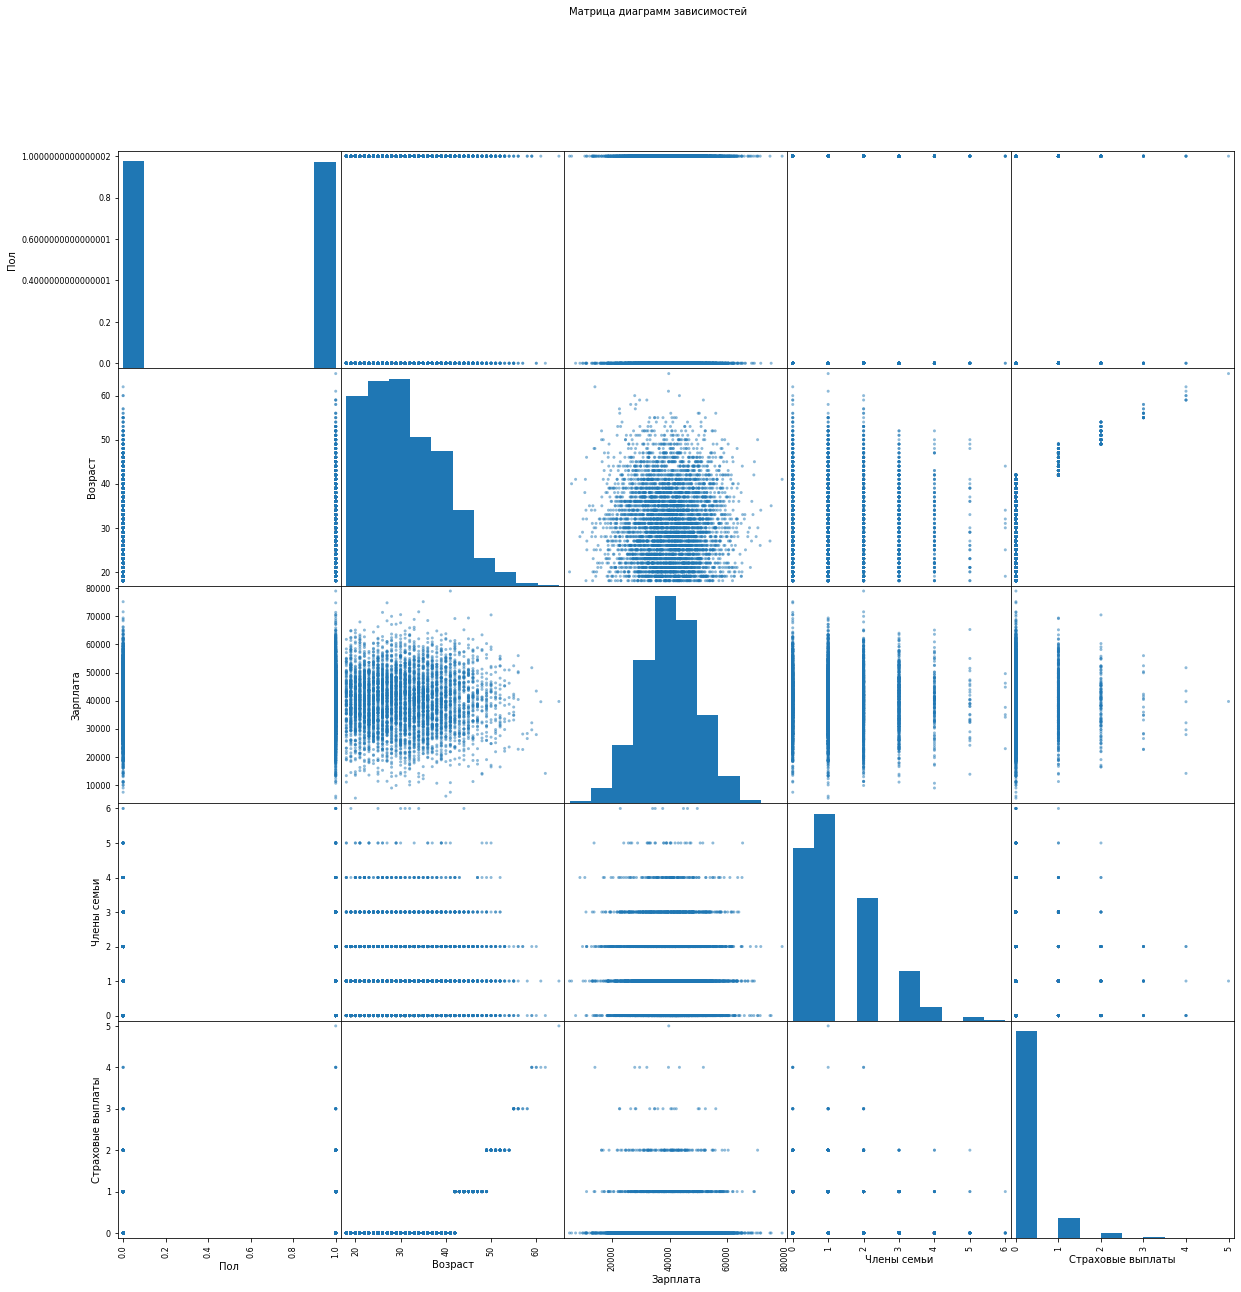

In [105]:
# Рассмотрим зависимость значений в столбцах между собой.
pd.plotting.scatter_matrix(data,figsize=(20,20))
plt.suptitle("Матрица диаграмм зависимостей", size=10)
plt.show()

**Вывод**

В данном разделе были загружены и изучены полученные данные. Получена таблица из 5000 строк и 5 столбцов. Можно обратить внимание, что таблица имеет 153 дубликата.

Отметим также, что у клиентов меньше 40 лет страховых выплат нет, у клиентов в возрастном диапозоне 40-50 лет по одной выплате, в диапозоне 45-55 лет по две выплаты, в возрастном диапозоне 50-60 лет 3-4 выплаты и 5 выплат характерны для клиентов, чей возратс старше 60 лет. Возможно, подобная закономерность может быть связана с тем, что данные созданны искуственно. 

Целью данной работы является формулирование метода шифрования данных, затем теоретическое обоснование и практическое подтверждение полученных выводов. Имеющиеся данные позволят в полной мере выполнить поставленные задачи.

    
<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Отлично, молодец, что провёл EDA
</div>

## Умножение матриц

**Задача:** Ответить на вопрос и обосновать решение.

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

a. Изменится. Приведите примеры матриц.

b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Обоснование:**

Для ответа на поставленный вопрос изучим $w_P$- вектор весов для новой матрицы признаков, которая может быть записана в виде: $XP$, т.е. матрица признаков умноженная на матрицу $Р$.

Формула обучения будет иметь вид:

$$
w_P = ((XP)^T (XP))^{-1} (XP)^T y
$$

Выполним преобразования, используя свойства транспонирования и обратных матриц, получим:

$$
w_P = (P^T X^T X P )^{-1} P^T X^T y
$$

$$
w_P = ((P^T X^T X) P )^{-1} P^T X^T y
$$

$$
w_P = P^{-1}(P^T (X^T X))^{-1} P^T X^T y
$$

$$
w_P = P^{-1}(X^T X)^{-1} ((P^T)^{-1}P^T) X^T y
$$


$$
w_P = P^{-1}(X^T X)^{-1} E X^T y
$$

$$
w_P = P^{-1}(X^T X)^{-1} X^T y
$$

$$
w_P = P^{-1} w
$$


Мы знаем, что формула предсказания:
$$
a = Xw
$$

Тогда, новое предсказание имеет вид:

$$
a_P = XPw_P = X(PP^{-1}) w = XEw=Xw = a
$$



**Ответ:**

Т.е. было получено, что при умножении признаков на обратимую матрицу результаты предсказания не меняются. Таким образом качество линейной регрессии остаётся неизменным.

Заметим, что парметры линейной регрессии в преобразованной задаче можно получить из формулы: $w_P = wP^{-1}$

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Абсолютно верно, молодец, что не раскрыл $(X^T X)^{-1}$, так как для неквадратных матриц $X$ и $X^T$ обратных матриц не существует. 
</div>


## Алгоритм преобразования

**Алгоритм**

Для защиты персональных данных клиентов возможно умножить матрицу, содержащую персональные данные, на некоторую обратимую матрицу Р. Тем самым будет получен некоторый сдвиг в данных, т.е. данные будет невозможно интерпретировать.

**Обоснование**

При использовании метода, описанного выше, для возвращения обратно к исходным данным достаточно умножить полученную матрицу значений на матрицу $P^{-1}$. Важно отметить, что подобный сдвиг не влияет на качество обучения линейной регрессии, что было доказано в предыдущем пункте исследования.
Стоит обратить внимание, что подобный метод шифрования не будет работать, если матрица данных обратимая, а ключ- это обратная матрица к матрице данных.

## Проверка алгоритма

In [106]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

In [107]:
model_before = LinearRegression()
model_before.fit(features,target)
predictions_before = model_before.predict(features)
r2_before = round(r2_score(target, predictions_before),8)
print('Значение метрики R2 до преборазований', r2_before)


Значение метрики R2 до преборазований 0.4249455


In [108]:
x = np.array(data.drop('Страховые выплаты', axis=1))

In [109]:
p = np.random.random((4, 4))
while np.linalg.det(A) == 0:
    p = np.random.random((4, 4))
p_inverse = np.linalg.inv(p)

In [110]:
xp = x @ p

In [111]:
model_after = LinearRegression()
model_after.fit(xp,target)
predictions_after = model_after.predict(xp)
r2_after = round(r2_score(target, predictions_after),8)
print('Значение метрики R2 после преборазований', r2_after)

Значение метрики R2 после преборазований 0.4249455


In [112]:
if r2_before == r2_after:
    print('Успех. Проверка алгоритма показала, что значения метрики R2 до и после умножения матрицы коэффициентов на обратимую матрицу не изменилась')
else:
    print('Провал. Проверка алгоритма показала, что значения метрики R2 до и после умножения матрицы коэффициентов на обратимую матрицу изменилась')

Успех. Проверка алгоритма показала, что значения метрики R2 до и после умножения матрицы коэффициентов на обратимую матрицу не изменилась


В качестве дополнительной проверки работоспособности полученного алгоритма проверим, возможно ли получить исходные данные из преобразованных.

In [113]:
x_returned = xp @ p_inverse

In [114]:
if allclose(x, x_returned)== True:
    print('Проверка проведена успешно, алгоритм способен восстановить исходные данные')
else:
    print('Проверка провалена, алгоритм не способен восстановить исходные данные')

Проверка проведена успешно, алгоритм способен восстановить исходные данные


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Верно, таким образом в случае домножения матрицы признаков на случайную обратимую матрицу можно обеспечить защиту данных, не потеряв в качестве модели. 
</div>


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования

## Вывод

В данной работе была поставлена задача предложить метод шифровария данных клиентов сервиса «Хоть потоп». Было получено, что при умножении матрицы данных на обратимую матрицу возможно зашифровать данные с последующей возможностью дешифровать данные.

Теоретический и эмпирический выводы показали, что подобный метод шифрования данных не влияет на качество обучения модели линейной регрессии.

Предложенный метод способен выполнить все поставленные задачи.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Спасибо тебе за проделанную работу, ты демонстрируешь отличное владение материалом спринта.
    
Отправляю обратно, чтобы ты мог задать какие-то вопросы, может хочешь какую-то подборку статей.   

Обзоры по применению криптографии в машинном обучении: https://arxiv.org/pdf/1902.04109.pdf, https://www.researchgate.net/publication/342746786_Some_Applications_of_Machine_Learning_in_Cryptography

Небольшой обзор на Шифр Хилла: https://habr.com/ru/post/595281/
   
Примеры использования линейной алгебры в машинном обучении:
https://machinelearningmastery.com/examples-of-linear-algebra-in-machine-learning/
    
Для чего нужна математика в машинном обучении?
https://proglib.io/p/dlya-chego-nuzhen-matematicheskiy-analiz-v-mashinnom-obuchenii-2021-02-15

Большая статья по векторам:
https://neptune.ai/blog/understanding-vectors-from-a-machine-learning-perspective  

Можно ещё дополнительно посмотреть лекции от МФТИ https://www.youtube.com/playlist?list=PLk4h7dmY2eYHHTyfLyrl7HmP-H3mMAW08
    
Классная серия роликов по линейной алгебре на английском (можно включить автоматические русские субтитры): https://www.youtube.com/playlist?list=PLRDl2inPrWQW1QSWhBU0ki-jq_uElkh2a
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Приветствую, Виктория! 
    
Спасибо за твою работу. Если у тебя нет замечаний к тому, что я сделал, то и у меня, пожалуй вопросов нет. 
    
Меня смутило, что метрики R2 не очень то и совпали, но мне объяснили, что небольшая погрешность может быть.
    
С удовольствием изучу подборку статей!
    
Хорошего дня!
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Да, там небольшое отличие в среднем после 9го знака после запятой, это ничего страшного, вызвано особенностями работы с матрицами и числами с плавающей точкой. Удачи в будущих проектах и работе =)
</div>